In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!go run generate_load.go \
    -invPath ../../../data/traces/traces/100_inv.csv \
    -runPath ../../../data/traces/traces/100_run.csv \
    -memPath ../../../data/traces/traces/100_mem.csv \
    -outputFile output.csv

INFO[0000] Parsing function invocation trace ../../../data/traces/traces/100_inv.csv (duration: 1440min) 
INFO[0000] Parsing function duration trace: ../../../data/traces/traces/100_run.csv 
INFO[0000] Parsing function memory trace: ../../../data/traces/traces/100_mem.csv 
INFO[0000] Traces contain the following: 100 functions  


In [4]:
!go run make_timeline.go \
    -inputFile output.csv \
    -outputFile processed.csv

INFO[0000] Max time: 86448393                           
INFO[0000] [millisecond functionHash runtime memory maxMemory cpu maxCpu] 
INFO[0001] Done reading, writing to file                
INFO[0240] Done writing to file                         


In [3]:
processed_traces = pd.read_csv("processed.csv")

In [10]:
processed_traces.tail()

,timestamp,funcCnt,memUsg,memReq,cpuUsg,cpuReq
86458450,86458450,4,474,592,416.0,668.0
86458451,86458451,4,474,592,416.0,668.0
86458452,86458452,4,474,592,416.0,668.0
86458453,86458453,4,474,592,416.0,668.0
86458454,86458454,4,474,592,416.0,668.0


/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_8195/3483570789.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


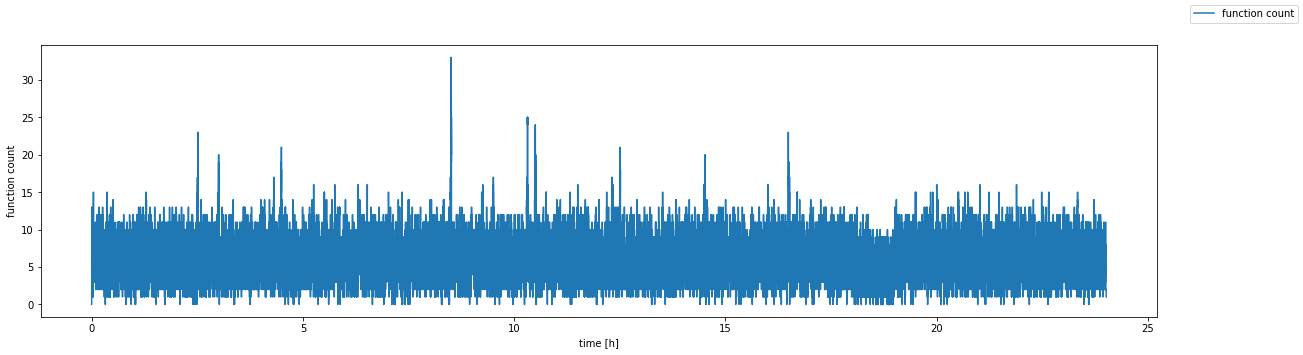

In [6]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["funcCnt"], label="function count")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_8195/4127051920.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


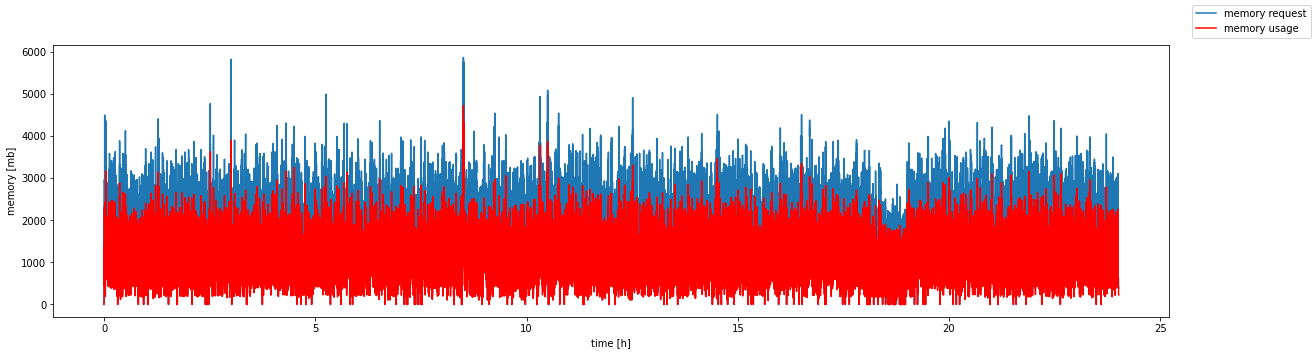

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["memReq"], label="memory request")
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["memUsg"], label="memory usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_8195/846946803.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


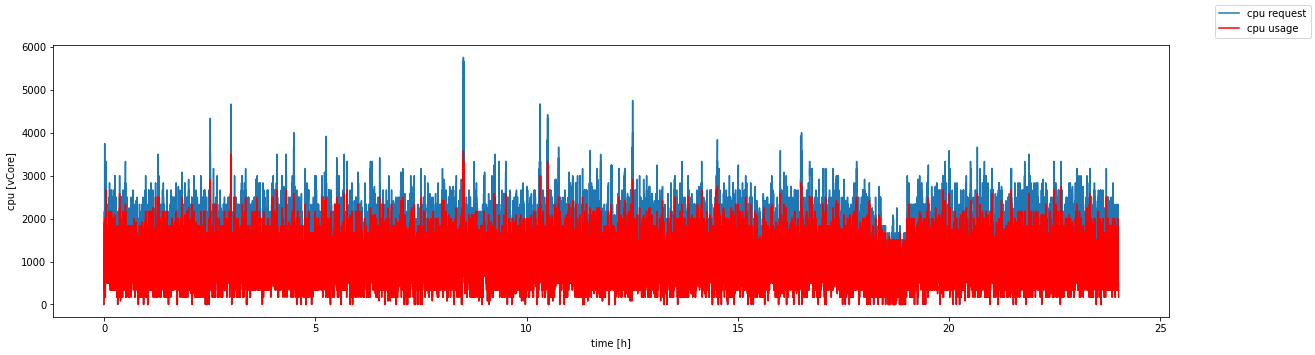

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["cpuReq"], label="cpu request")
ax.step(processed_traces["timestamp"] / (60*60*1000), processed_traces["cpuUsg"], label="cpu usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

In [4]:
rolling = processed_traces.rolling(window=60*1000, min_periods=1, center=True).mean()
rolling.tail()

,timestamp,funcCnt,memUsg,memReq,cpuUsg,cpuReq
86448389,86433391.0,1.855924,389.337410,582.006599,309.939310,475.939310
86448390,86433391.5,1.855919,389.336488,582.005499,309.938508,475.938508
86448391,86433392.0,1.855914,389.335566,582.004400,309.937706,475.937706
86448392,86433392.5,1.855910,389.334644,582.003300,309.936904,475.936904
86448393,86433393.0,1.855905,389.333722,582.002200,309.936102,475.936102


In [5]:
trace_max = processed_traces.rolling(window=60*1000, min_periods=1, center=True).max()
trace_max.tail()

,timestamp,funcCnt,memUsg,memReq,cpuUsg,cpuReq
86448389,86448393.0,2.0,417.0,615.0,334.0,500.0
86448390,86448393.0,2.0,417.0,615.0,334.0,500.0
86448391,86448393.0,2.0,417.0,615.0,334.0,500.0
86448392,86448393.0,2.0,417.0,615.0,334.0,500.0
86448393,86448393.0,2.0,417.0,615.0,334.0,500.0


In [6]:
trace_min = processed_traces.rolling(window=60*1000, min_periods=1, center=True).min()
trace_min.tail()

,timestamp,funcCnt,memUsg,memReq,cpuUsg,cpuReq
86448389,86418389.0,1.0,225.0,386.0,167.0,333.0
86448390,86418390.0,1.0,225.0,386.0,167.0,333.0
86448391,86418391.0,1.0,225.0,386.0,167.0,333.0
86448392,86418392.0,1.0,225.0,386.0,167.0,333.0
86448393,86418393.0,1.0,225.0,386.0,167.0,333.0


In [7]:
import matplotlib.colors as colors

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_8195/3440669913.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


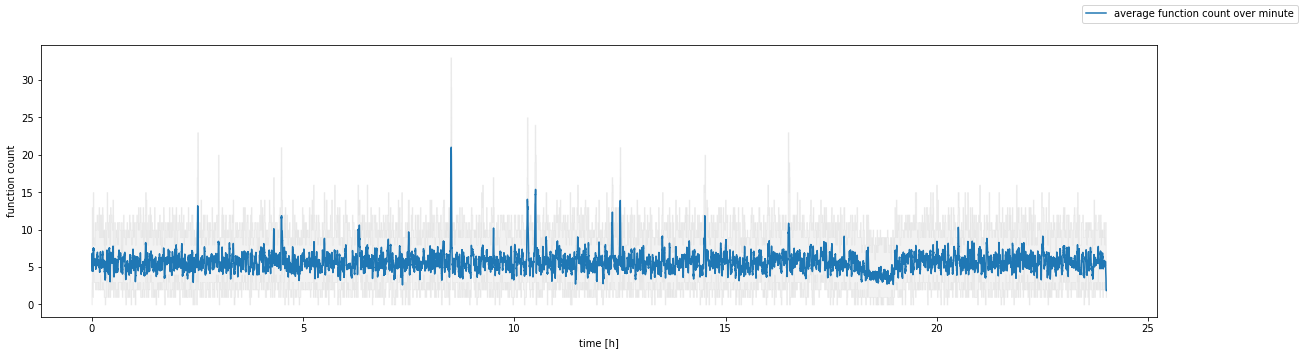

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["funcCnt"], trace_max['funcCnt'], color=colors.to_rgba('gray', 0.1))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["funcCnt"], label="average function count over minute")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_8195/963913263.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


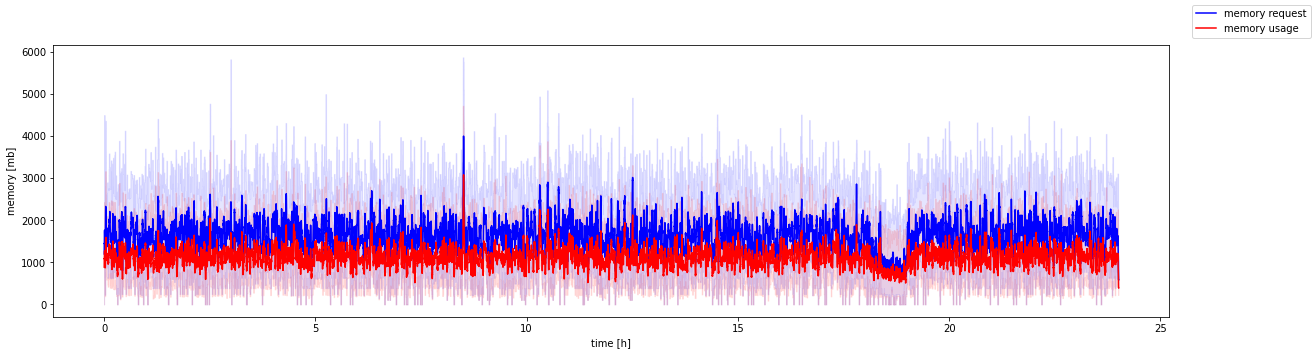

In [14]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["memReq"], trace_max['memReq'], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["memUsg"], trace_max['memUsg'], color=colors.to_rgba('red', 0.1))
ax.step(rolling["timestamp"] / (60*60*1000), rolling["memReq"], label="memory request", color="blue")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["memUsg"], label="memory usage", color="red")

# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_9618/2273722285.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


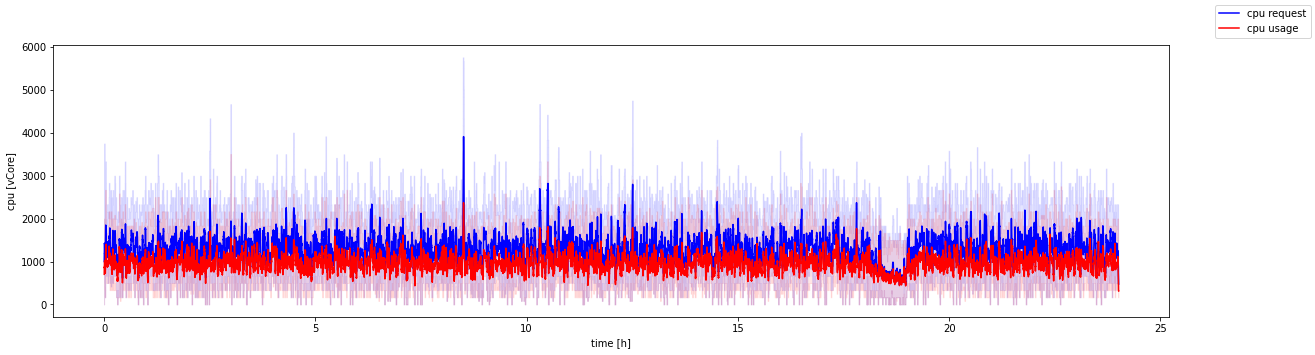

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["cpuReq"], trace_max['cpuReq'], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["cpuUsg"], trace_max['cpuUsg'], color=colors.to_rgba('red', 0.1))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuReq"], label="cpu request", color="blue")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuUsg"], label="cpu usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_9618/2015768400.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


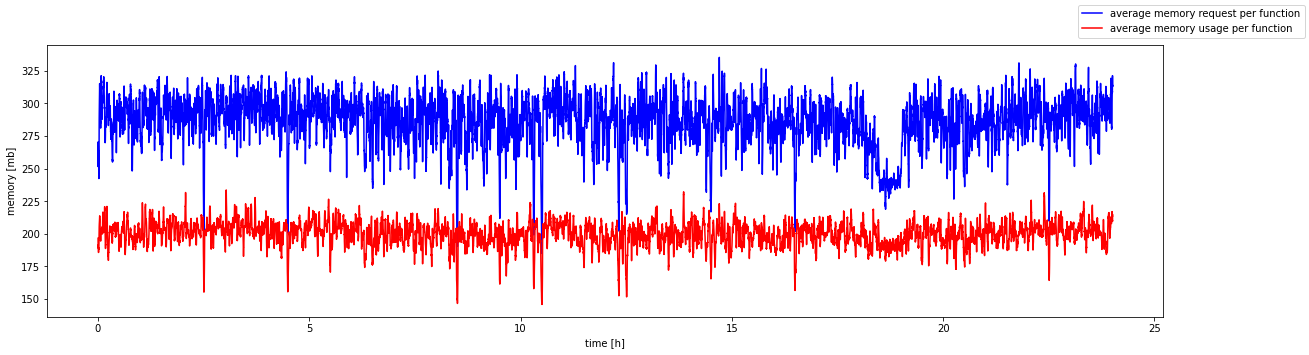

In [9]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["memReq"] / rolling["funcCnt"], label="average memory request per function", color="blue")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["memUsg"] / rolling["funcCnt"], label="average memory usage per function", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_9618/2116773518.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


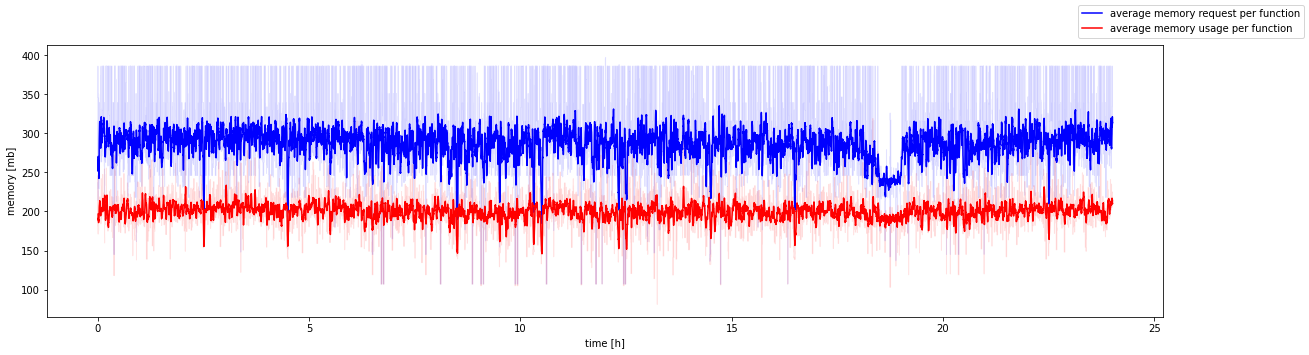

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["memReq"] / trace_min["funcCnt"], trace_max['memReq'] / trace_max["funcCnt"], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["memUsg"] / trace_min["funcCnt"], trace_max['memUsg'] / trace_max["funcCnt"], color=colors.to_rgba('red', 0.1))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["memReq"] / rolling["funcCnt"], label="average memory request per function", color="blue")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["memUsg"] / rolling["funcCnt"], label="average memory usage per function", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_9618/2972777265.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


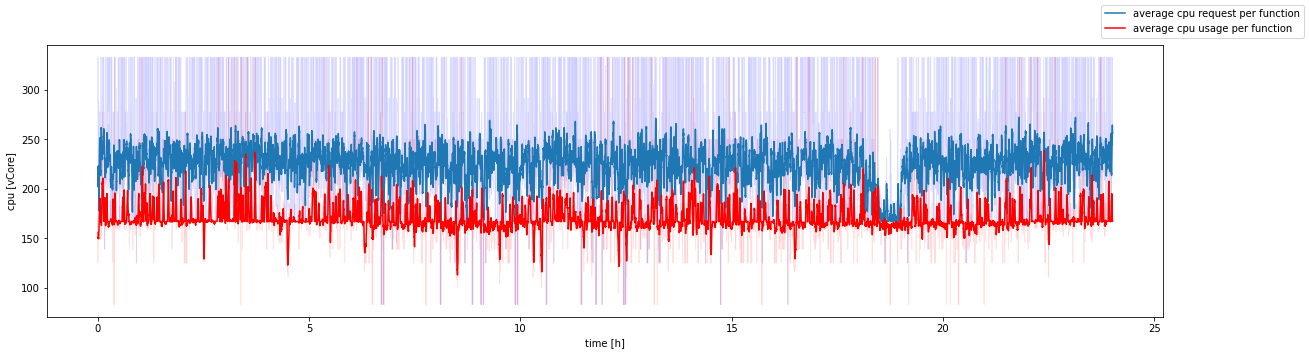

In [11]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["cpuReq"] / trace_min["funcCnt"], trace_max['cpuReq'] / trace_max["funcCnt"], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min["timestamp"] / (60*60*1000), trace_min["cpuUsg"] / trace_min["funcCnt"], trace_max['cpuUsg'] / trace_max["funcCnt"], color=colors.to_rgba('red', 0.1))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuReq"] / rolling["funcCnt"], label="average cpu request per function")
ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuUsg"] / rolling["funcCnt"], label="average cpu usage per function", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_15989/3392836739.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


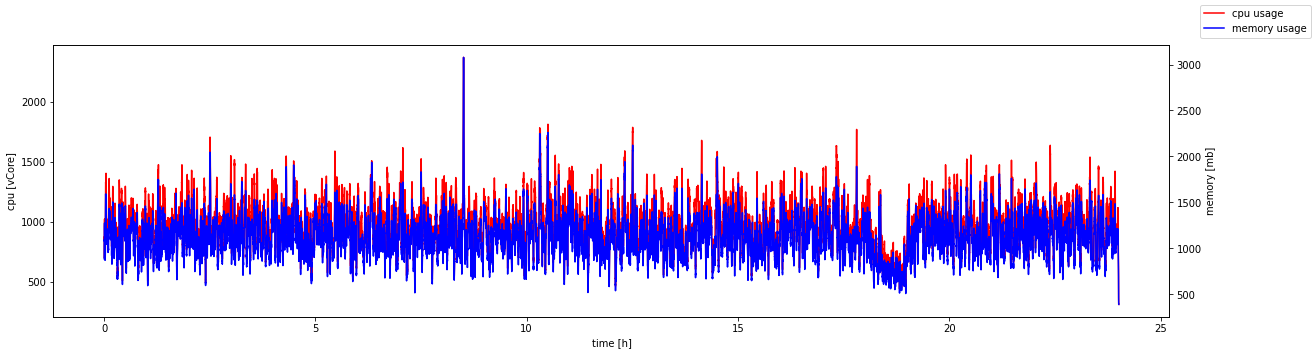

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.step(rolling["timestamp"] / (60*60*1000), rolling["cpuUsg"], label="cpu usage", color="red")
ax2 = ax.twinx()
ax2.step(rolling["timestamp"] / (60*60*1000), rolling["memUsg"], label="memory usage", color="blue")

# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
ax2.set_ylabel("memory [mb]")
fig.legend()
fig.show()

In [9]:
processed_traces[["funcCnt", "memUsg", "memReq", "cpuUsg", "cpuReq"]].corr(method="spearman")

,funcCnt,memUsg,memReq,cpuUsg,cpuReq
funcCnt,1.000000,0.985037,0.964691,0.979618,0.961764
memUsg,0.985037,1.000000,0.976667,0.989503,0.970047
memReq,0.964691,0.976667,1.000000,0.968998,0.994799
cpuUsg,0.979618,0.989503,0.968998,1.000000,0.960560
cpuReq,0.961764,0.970047,0.994799,0.960560,1.000000


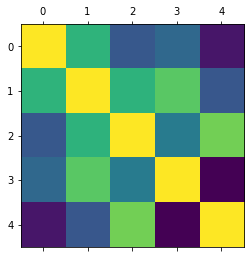

In [12]:
plt.matshow(processed_traces[["funcCnt", "memUsg", "memReq", "cpuUsg", "cpuReq"]].corr())
plt.show()

In [13]:
rand_start = np.random.randint(0, len(processed_traces) - 1)

In [14]:
rand_start

61037283

In [15]:
processed_traces_hour = processed_traces[processed_traces["timestamp"].between(rand_start, rand_start + (60*1000))]
rolling_hour = rolling[rolling["timestamp"].between(rand_start, rand_start + (60*1000))]
trace_min_hour = trace_min[trace_min["timestamp"].between(rand_start, rand_start + (60*1000))]
trace_max_hour = trace_max[trace_max["timestamp"].between(rand_start, rand_start + (60*1000))]

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_15989/2755090146.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


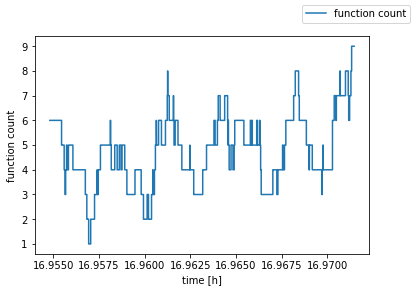

In [16]:
fig, ax = plt.subplots()
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["funcCnt"], label="function count")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_15989/1524033194.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


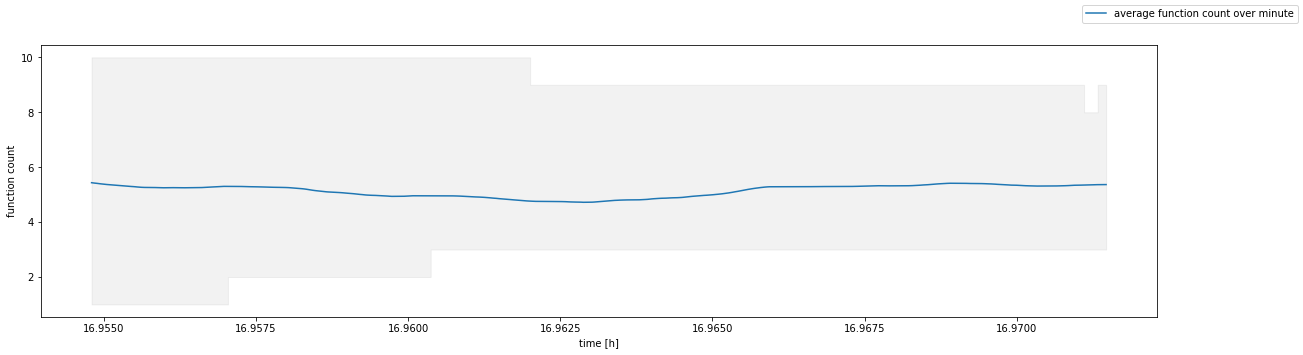

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["funcCnt"], trace_max_hour['funcCnt'], color=colors.to_rgba('gray', 0.1))

ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["funcCnt"], label="average function count over minute")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("function count")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_15989/3869109677.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


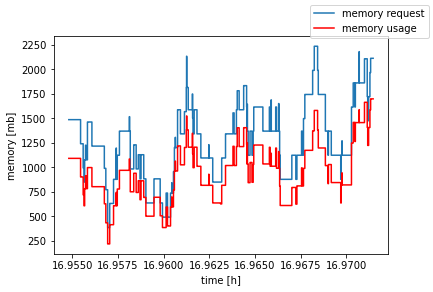

In [18]:
fig, ax = plt.subplots()
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["memReq"], label="memory request")
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["memUsg"], label="memory usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_15989/1732472264.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


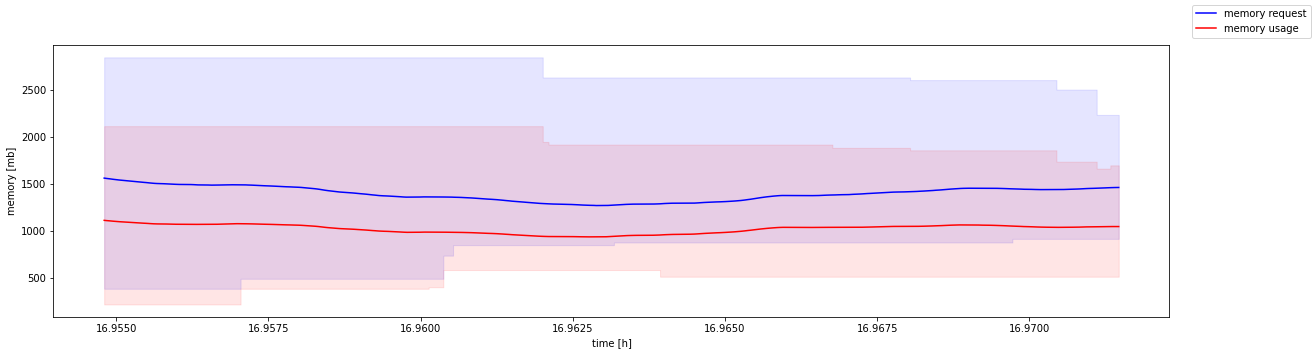

In [19]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["memReq"], trace_max_hour['memReq'], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["memUsg"], trace_max_hour['memUsg'], color=colors.to_rgba('red', 0.1))
ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["memReq"], label="memory request", color="blue")
ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["memUsg"], label="memory usage", color="red")

# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("memory [mb]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_15989/2691938859.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


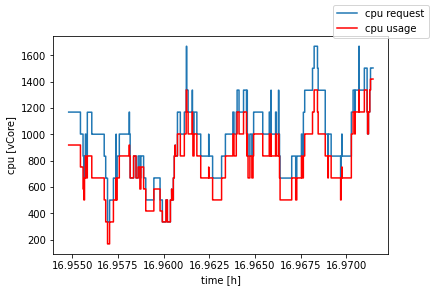

In [20]:
fig, ax = plt.subplots()
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["cpuReq"], label="cpu request")
ax.step(processed_traces_hour["timestamp"] / (60*60*1000), processed_traces_hour["cpuUsg"], label="cpu usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

/var/folders/0h/1tnx1wj56kq8vbypv4_dl2zm0000gn/T/ipykernel_15989/2321751599.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


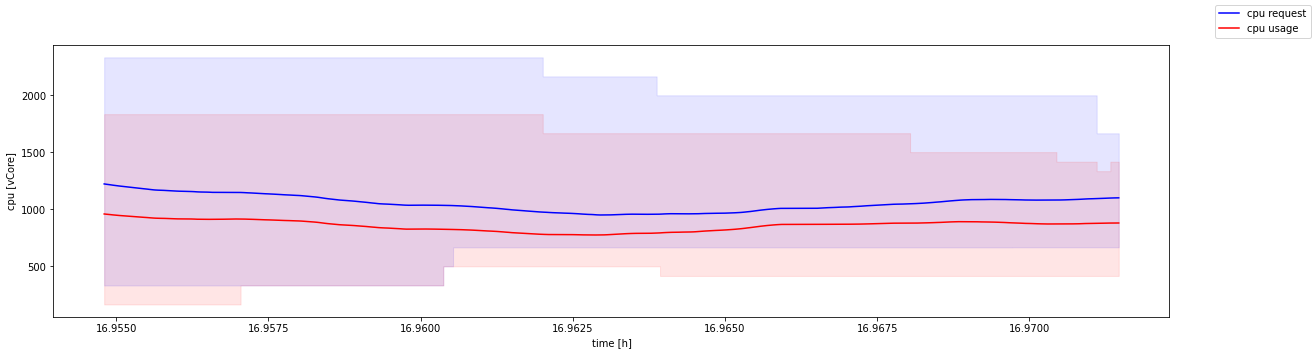

In [21]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["cpuReq"], trace_max_hour['cpuReq'], color=colors.to_rgba('blue', 0.1))
ax.fill_between(trace_min_hour["timestamp"] / (60*60*1000), trace_min_hour["cpuUsg"], trace_max_hour['cpuUsg'], color=colors.to_rgba('red', 0.1))

ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["cpuReq"], label="cpu request", color="blue")
ax.step(rolling_hour["timestamp"] / (60*60*1000), rolling_hour["cpuUsg"], label="cpu usage", color="red")
# ax.set_yscale("log")
ax.set_xlabel("time [h]")
ax.set_ylabel("cpu [vCore]")
fig.legend()
fig.show()

In [22]:
processed_traces["mem_diff_percentage"] = (processed_traces["memReq"] - processed_traces["memUsg"]) / processed_traces["memReq"]

In [23]:
processed_traces["cpu_diff_percentage"] = (processed_traces["cpuReq"] - processed_traces["cpuUsg"]) / processed_traces["cpuReq"]

In [24]:
processed_traces.mean()

timestamp              4.322420e+07
funcCnt                5.665089e+00
memUsg                 1.129369e+03
memReq                 1.622325e+03
cpuUsg                 9.650090e+02
cpuReq                 1.280711e+03
mem_diff_percentage    3.024466e-01
cpu_diff_percentage    2.375204e-01
dtype: float64